In [ ]:
import ibmJupyterNotebookStyles
ibmJupyterNotebookStyles.apply_ibm_styles()

## The Nelder-Mead algorithm

In [1]:
import ibmJupyterNotebookStyles
ibmJupyterNotebookStyles.apply_ibm_styles()

In [2]:
import numpy as np
import matplotlib as mpl
mpl.use("Agg")
from scipy.optimize import rosen
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline

The Nelder-Mead algorithm is a trusted-region algorithm that uses a *simplex* to search for a minimum. An $n$-simplex of $n+1$ affinely independent points (also referred to as vertices of the simplex) is the convex hull of these points. A two-dimensional simplex is a triangle, a three dimensional simplex is a tetrahedron, etc. The algorithm orders the vertices of the simplex in increasing value of the function to optimize. The algorithm defines rules on how to progress the simplex from one iteration to the next until it shrinks close to the optimal point upon convergence. During a step of the algorithm, the highest value point of the simplex is reflected with respect to the centroid of the remaining points. Depending on the value of the newly obtained point, the simplex is updated by replacing the high value point with a new one, or it shrinks in size. 

<div>
<img src="NM.png" width="750">
</div>

The convergence criterion is satisfied when the standard deviation of the `y` values of the simplex corners is less than a prespecified tolerance $\epsilon$. The following is a flow chart of the algorithm<sup>1</sup>.

<div>
<img src=NMflow.png width="750">
</div>

In [7]:
def nelder_mead_step(of, simp, alpha=1, beta=2, gamma=0.5, sigma=0.5):

    nsimp, _ = simp.shape         
    y = of(simp.T)
    # Sort the simplex points so they are in increasing f value.
    order = np.argsort(y)
    simp = simp[order, :]
    y = y[order]
    # Calculate xbar, the centroid of the simplex minus the last point (highest f since we ordered).
    xbar = simp[:-1, :].mean(axis=0)
    # Reflection: Reflect highest point w.r.t. centroid.
    xr = xbar + alpha*(xbar - simp[-1, :])
    yr = of(xr)

    if yr<y[0]: ##expansion
        xe = xbar + beta*(xr - xbar)
        ye = of(xe)
        if ye < yr:
            new_simp = np.vstack((simp[:-1, :], xe)) #replace largest x with xe
        else:
            new_simp = np.vstack((simp[:-1, :], xr)) #replace largest x with xr
    elif yr > y[1]:
        if yr<=y[-1]:
            new_simp = np.vstack((simp[:-1, :], xr))
        xc = xbar + gamma*(simp[-1, :] - xbar)
        yc = of(xc)
        if yc < y[-1]: ## contraction
            new_simp = np.vstack((simp[:-1, :], xc)) #replace highest point by xc
        else: ## shrinkage
            new_simp = np.zeros_like(simp)
            new_simp[0, :] = simp[0, :]
            for k in range(1, nsimp):
                new_simp[k, :] = sigma*(simp[k,:] - simp[0,:])
    else:
        new_simp = np.vstack((simp[:-1, :], xr))

    return new_simp


These are the `(x,y,z)` points used for the function plot. We are using the Rosenbrock function $100(x_2-x_1^2)^2+(1-x_1)^2$ for this example. The function is implemented as `rosen` in `scipy.optimize`.

In [8]:
npts = 201
x, y = np.mgrid[-2:2:npts*1j, -1:3:npts*1j]
x.shape = (npts**2)
y.shape = (npts**2)
z = rosen(np.vstack((x, y)))
x.shape = (npts, npts)
y.shape = (npts, npts)
z.shape = (npts, npts)

This is the main execution of the algorithm. `num` is the number of Nedler-Mead iterations we want to run.  

In [24]:
def data_gen(num,fig,eps):
    # These are the three starting corners of the simplex
    x0 = np.array([1, 0])
    x1 = np.array([2, 0])
    x2 = np.array([1.5,2])
    sim_list=[]
    # We stack them 
    simp = np.vstack((x0, x1, x2))
    sim_list.append(simp)
    levels = np.logspace(0, 3.2, 5)
    ax1 = fig.add_subplot(frows,3,1)
    ax1.contour(x, y, z, levels)
    poly = plt.Polygon(simp, facecolor="none", edgecolor="r",linewidth=1.5)
    ax1.add_patch(poly)
    # We run num steps of the algorithm
    for k in range(num):
        ax1 = fig.add_subplot(frows,3,k+2)
        simp = nelder_mead_step(rosen, simp)
        sim_list.append(simp)
        # Plots
        levels = np.logspace(0, 3.2, 5)
        ax1.contour(x, y, z, levels)
        poly = plt.Polygon(simp, facecolor="none", edgecolor="r",linewidth=1.5)
        ax1.add_patch(poly)
        conv=np.std(rosen(simp.T))
        if conv < eps:
            break
    print('Optimal solution at:',sim_list[k][1], ' found after ', k, 'iterations.' )
    return sim_list

Optimal solution at: [1.02911666 1.06018956]  found after  18 iterations.


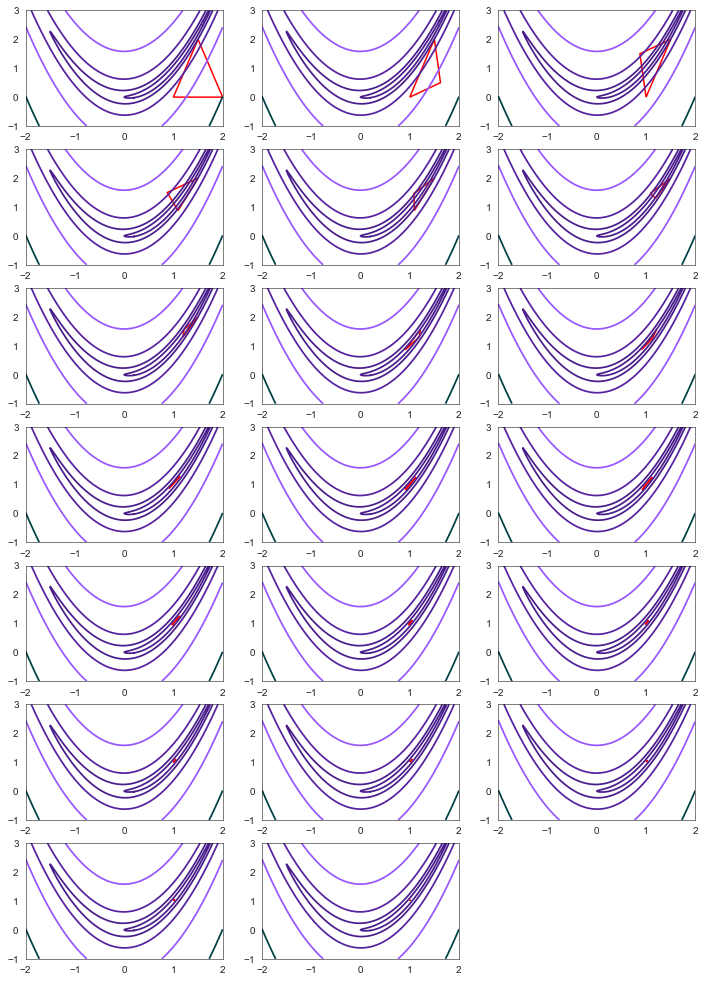

In [25]:
%matplotlib inline
fig = plt.figure(figsize=(12, 20))
eps=0.0001
its=24
frows=int(its/3)
sim_list=data_gen(its,fig,eps)

## References
<a id='Kochenderfer2019'></a>1. Kochenderfer, Wheeler, *Algorithms for Optimization*, The MIT Press, 2019.<br>

<span style="font-size:10pt; font-weight:bold;"> &copy; Copyright IBM Corp. 2023 <br/>This content is categorized as an “existing” IBM asset as part of the IBM Quantum Accelerator contract. </span>